In [1]:

import kagglehub
hariharasudhanas_twitter_emoji_prediction_path = kagglehub.dataset_download('hariharasudhanas/twitter-emoji-prediction')

print('Data source import complete.')


100%|██████████| 3.50M/3.50M [00:00<00:00, 48.4MB/s]

Extracting files...


Data source import complete.


In [2]:

import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import zipfile

with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [4]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

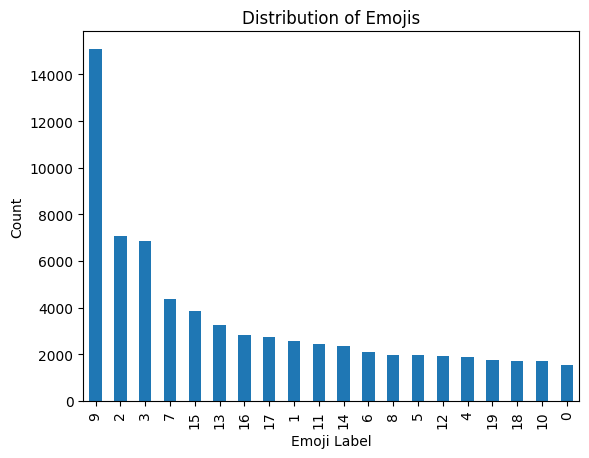

In [5]:

data = pd.read_csv("/content/Train.csv")

data = data.drop(columns=['Unnamed: 0'])
data.head()

data['Label'].value_counts().plot(kind='bar')
plt.xlabel("Emoji Label")
plt.ylabel("Count")
plt.title("Distribution of Emojis")
plt.show()


In [6]:
data.head()

,TEXT,Label
0,Vacation wasted ! #vacation2017 #photobomb #ti...,0
1,"Oh Wynwood, you’re so funny! : @user #Wynwood ...",1
2,Been friends since 7th grade. Look at us now w...,2
3,This is what it looks like when someone loves ...,3
4,RT @user this white family was invited to a Bl...,3


In [7]:

mapping = pd.read_csv("/content/Mapping.csv", usecols=[1, 2], names=["Emoji", "Label"], header=0)
mapping.head(20)

,Emoji,Label
0,😜,0
1,📸,1
2,😍,2
3,😂,3
4,😉,4
5,🎄,5
6,📷,6
7,🔥,7
8,😘,8
9,❤,9


In [8]:

emoji_dict = dict(zip(mapping["Label"], mapping["Emoji"]))
print(emoji_dict)

{0: '😜', 1: '📸', 2: '😍', 3: '😂', 4: '😉', 5: '🎄', 6: '📷', 7: '🔥', 8: '😘', 9: '❤', 10: '😁', 11: '🇺🇸', 12: '☀', 13: '✨', 14: '💙', 15: '💕', 16: '😎', 17: '😊', 18: '💜', 19: '💯'}


In [9]:

import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

data["TEXT"] = data["TEXT"].apply(clean_text)

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data["TEXT"])

sequences = tokenizer.texts_to_sequences(data["TEXT"])
maxlen = 20
X = pad_sequences(sequences, maxlen=maxlen)

y = np.array(data["Label"])

In [12]:

model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=maxlen),
    LSTM(256, dropout=0.3, recurrent_dropout=0.3),
    Dense(20, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X, y, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 305s 172ms/step - accuracy: 0.2420 - loss: 2.6275 - val_accuracy: 0.3136 - val_loss: 2.3575
Epoch 2/2
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 344s 185ms/step - accuracy: 0.3341 - loss: 2.2758 - val_accuracy: 0.3288 - val_loss: 2.3021


In [13]:

def predict_emoji(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    seq = pad_sequences(seq, maxlen=maxlen)
    pred = model.predict(seq)[0]

    emoji_index = np.argmax(pred)
    print(f"Predicted Label: {emoji_index}")

    predicted_emoji = emoji_dict.get(emoji_index, "❓")
    return predicted_emoji



In [14]:

sample_inputs = [
    "I am so happy today!",
    "Had an amazing day at the beach!  ",
    "I love eating pizza!",
    "That was a hilarious joke!",
    "I am really angry right now."
]

for text in sample_inputs:
    print(f"Input: {text}")
    print("Predicted Emoji:", predict_emoji(text))
    print("-" * 30)


Input: I am so happy today!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
Predicted Label: 9
Predicted Emoji: ❤
------------------------------
Input: Had an amazing day at the beach!  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Label: 12
Predicted Emoji: ☀
------------------------------
Input: I love eating pizza!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Label: 9
Predicted Emoji: ❤
------------------------------
Input: That was a hilarious joke!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Label: 3
Predicted Emoji: 😂
------------------------------
Input: I am really angry right now.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted Label: 3
Predicted Emoji: 😂
------------------------------
